## Before we start ...
> #### Understanding your data (domain knowledge)    
> #### Limitations of algorithms (no one size fits all)    
> #### Bias-variance tradeoff   
> #### Precision-recall tradeoff   
> #### No Free Lunch theorem

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
dram = pd.read_csv('./data/dram_price.csv', index_col=0)
print(f'# of instances = {dram.shape[0]}')
print(f'# of features = {dram.shape[1]}')
print(f'Data types: \n{dram.dtypes}')
dram.tail()

# of instances = 333
# of features = 2
Data types: 
date     float64
price    float64
dtype: object


,date,price
328,2015.58,0.0045
329,2015.67,0.0043
330,2015.75,0.0042
331,2015.83,0.0038
332,2015.92,0.0037


Text(0.5, 1.0, 'Historical DRAM Price')

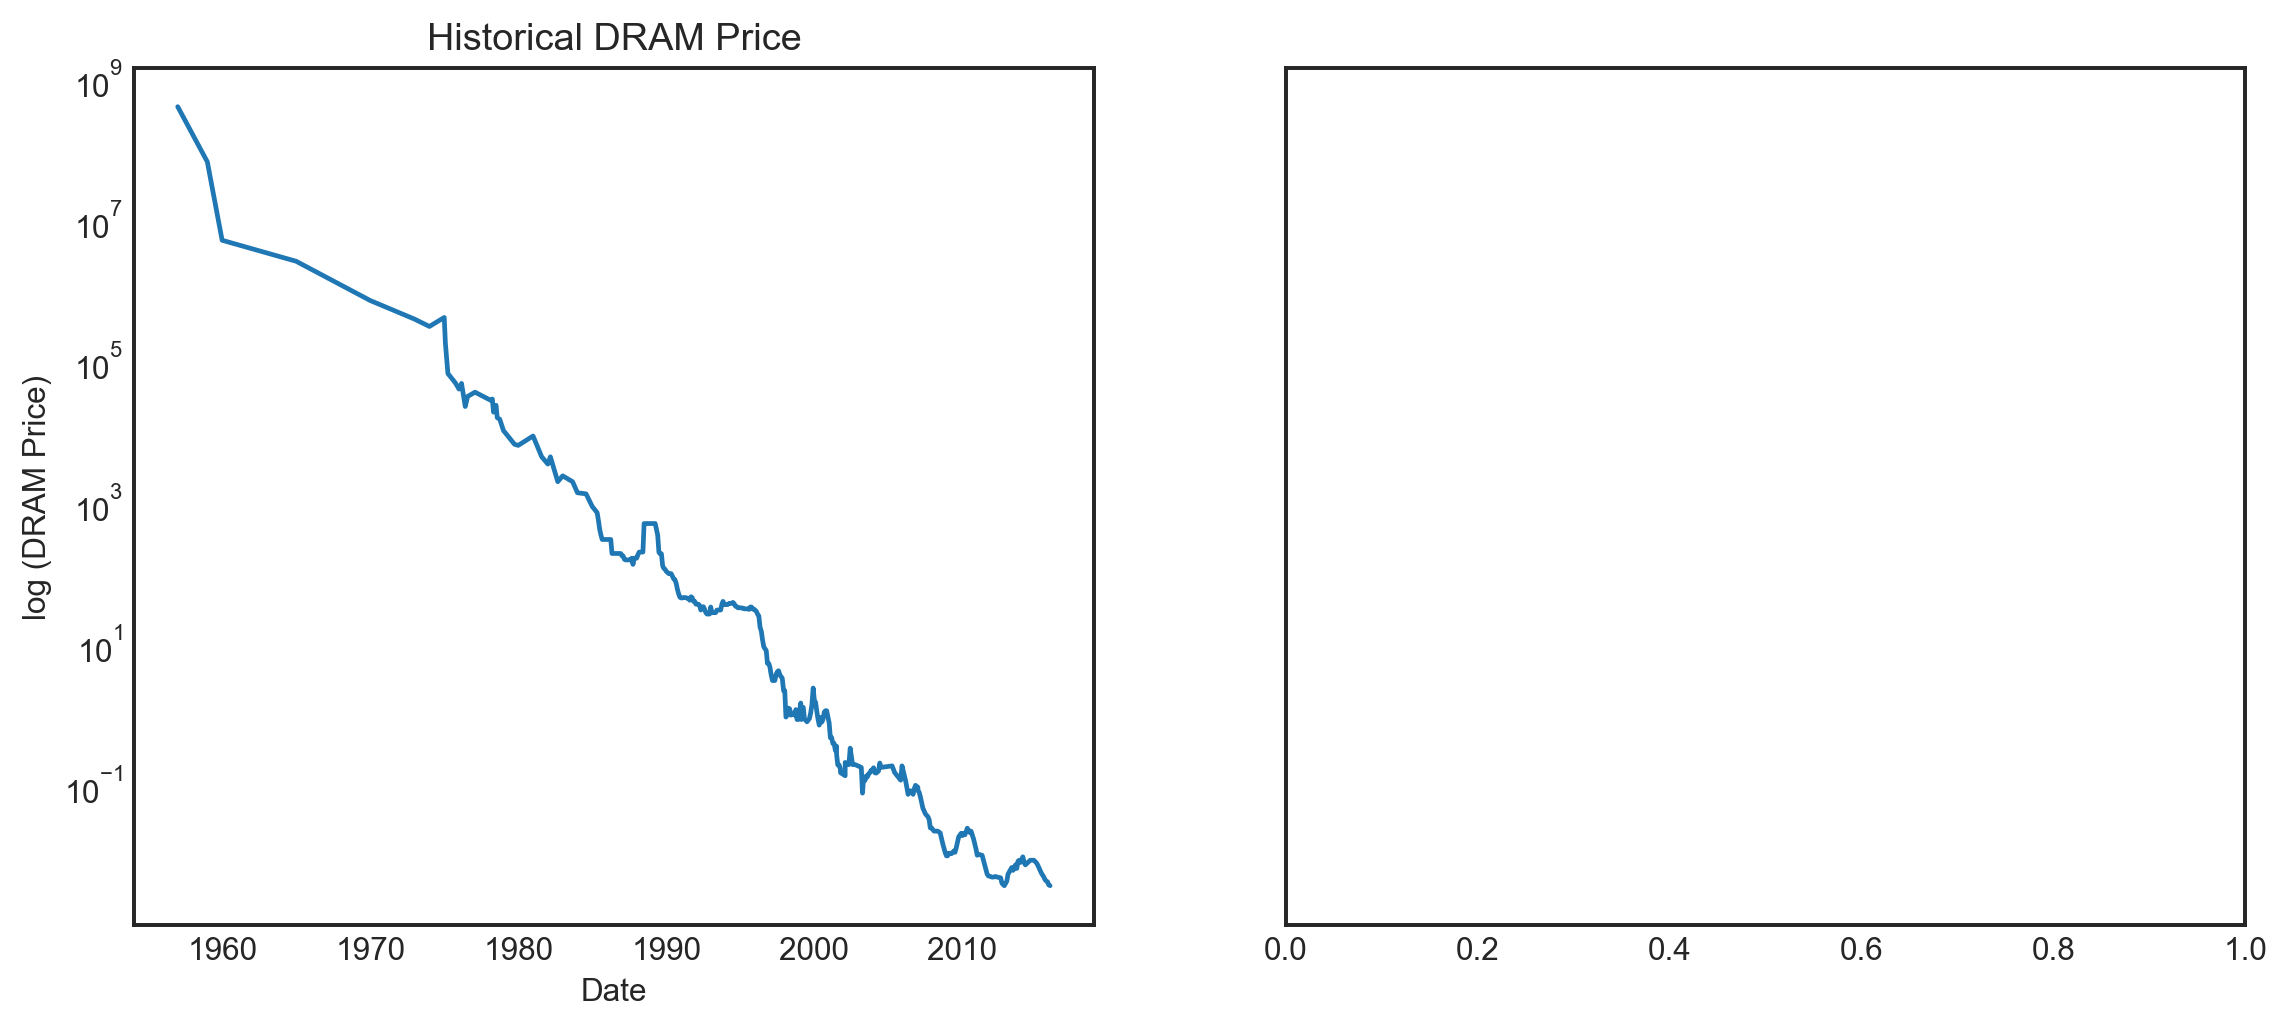

In [3]:
fig, axes = plt.subplots(1, 2, dpi=227, sharey=True, figsize=(12, 5))
ax = axes[0]
ax.plot(dram['date'], dram['price'])
ax.plot()
ax.set_yscale('log')
ax.set_xlabel('Date')
ax.set_ylabel('log (DRAM Price)')
ax.set_title('Historical DRAM Price')

In [4]:
X = dram.date
y = dram.price
X_train = dram.values[:202, 0]
X_test = dram.values[202:, 0]
y_train = dram.values[:202, 1]
y_test = dram.values[202:, 1]
X_train.shape, X_test.shape

((202,), (131,))

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train.reshape(-1, 1), np.log(y_train)) 

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train.reshape(-1, 1), np.log(y_train))


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [6]:
def Plot_regression(model, X, y, X_train, X_test=None, ax=None, c='blue'):
    if ax is None:
        ax=plt.gca()
    ax.plot(X, y, c='gray', linewidth=6, label='Actual')
    ax.plot(X_train, np.exp(model.predict(X_train.reshape(-1, 1))), c=c, linewidth=2)
    if X_test is not None:
        ax.plot(X_test, np.exp(model.predict(X_test.reshape(-1, 1))), c='orange', linewidth=2, linestyle='--')
    ax.set_yscale('log')
    ax.set_xlabel('Date')

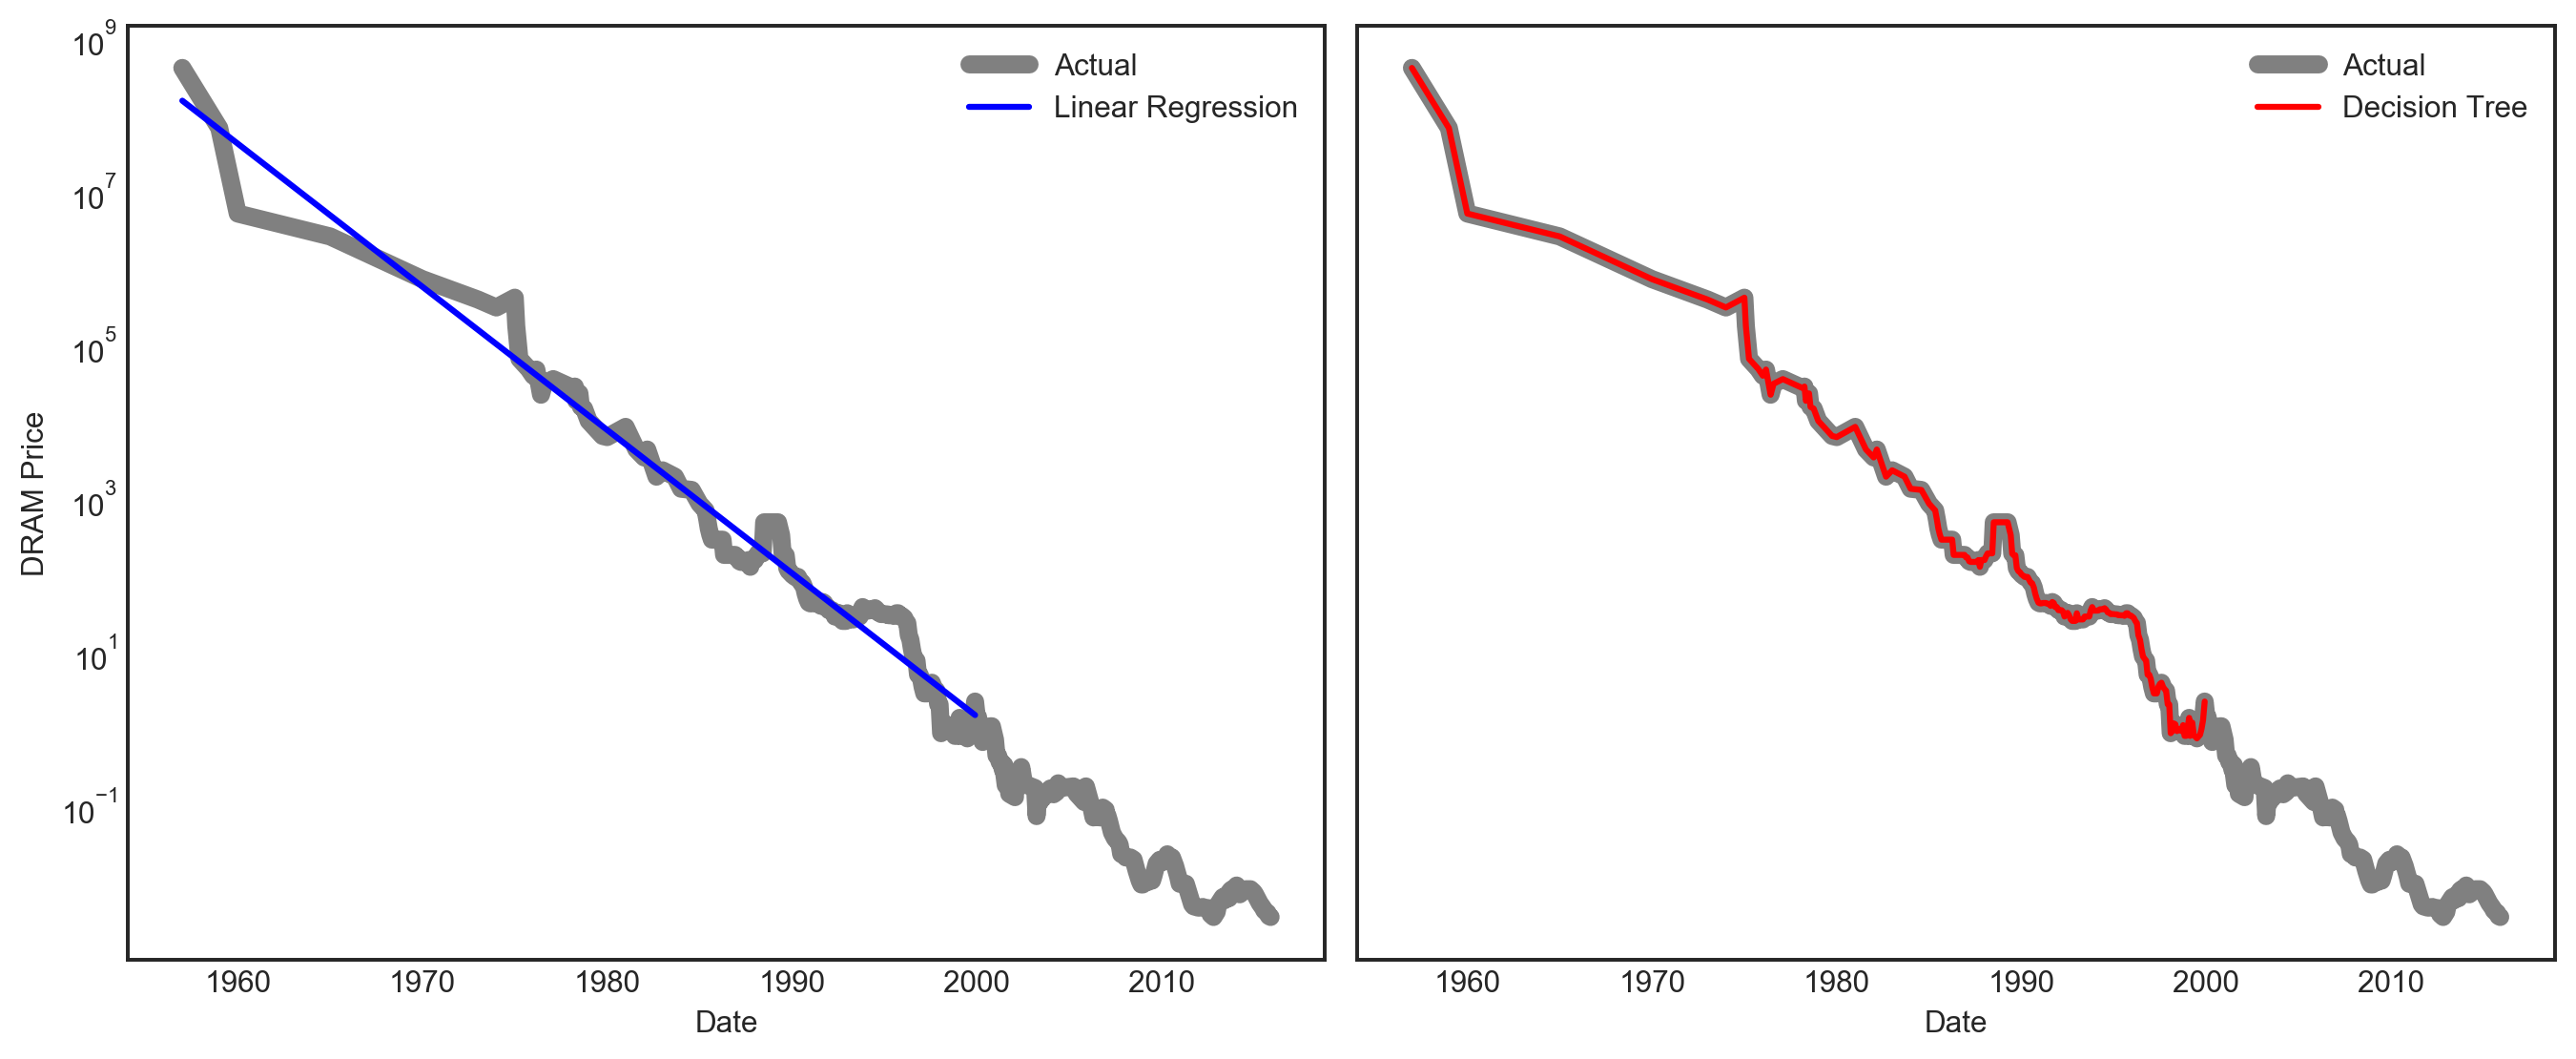

In [7]:
# Plot model back test results
fig, axes = plt.subplots(1, 2, dpi=227, sharey=True, figsize=(12, 5))
Plot_regression(lr, X, y, X_train, ax=axes[0], c='b')
Plot_regression(tree, X, y, X_train, ax=axes[1], c='r')
axes[0].legend(['Actual', 'Linear Regression', 'Prediction'])
axes[1].legend(['Actual', 'Decision Tree', 'Prediction'])
axes[0].set_ylabel('DRAM Price')
plt.tight_layout()
plt.savefig('fig.png')

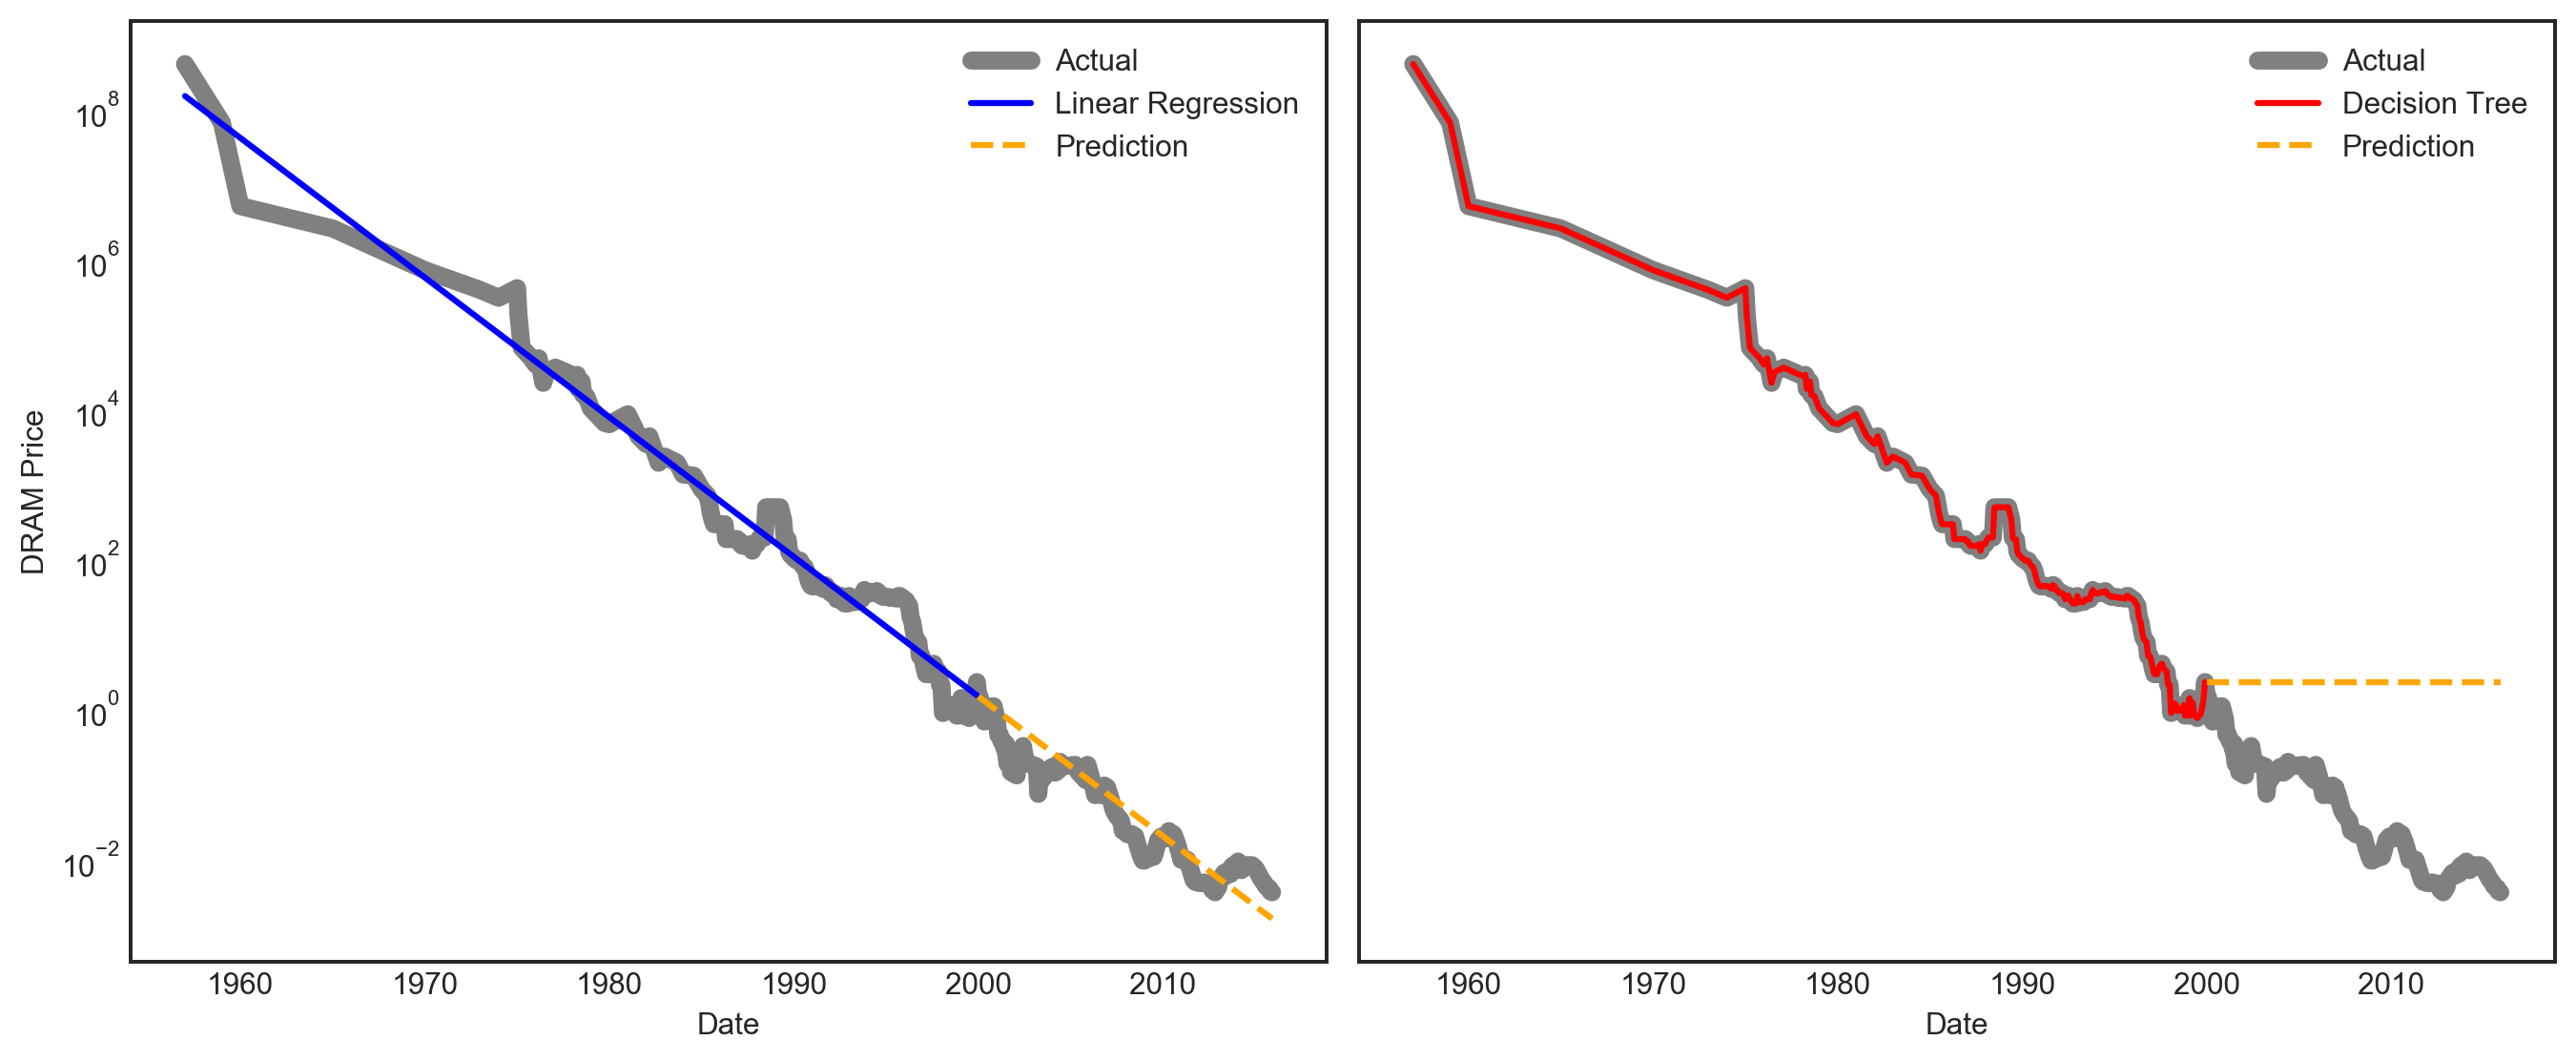

In [8]:
# Plot model-predicted results
fig, axes = plt.subplots(1, 2, dpi=227, sharey=True, figsize=(12, 5))
Plot_regression(lr, X, y, X_train, X_test, ax=axes[0], c='b')
Plot_regression(tree, X, y, X_train, X_test, ax=axes[1], c='r')
axes[0].legend(['Actual', 'Linear Regression', 'Prediction'])
axes[1].legend(['Actual', 'Decision Tree', 'Prediction'])
axes[0].set_ylabel('DRAM Price')
plt.tight_layout()